In [1]:
import uproot
import awkward as ak
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import math
import hist
import vector
import os
import subprocess
import gc
import pandas as pd
from scipy.optimize import curve_fit
from scipy.integrate import quad
from scipy.interpolate import interp1d
print("uproot version", uproot.__version__)
print("awkward version", ak.__version__)
print("numpy version", np.__version__)
print("matplotlib version", matplotlib.__version__)
print("hist version", hist.__version__)
print("vector version", vector.__version__)
#print("os version", os.__version__)
#print("subprocess version", subprocess.__version__)
#print("gc version", gc.__version__)
print("pandas version", pd.__version__)
#print("scipy.optimize version", scipy.optimize.__version__)
#print("scipy.integrate version", scipy.integrate.__version__)

uproot version 5.0.12
awkward version 2.4.3
numpy version 1.25.2
matplotlib version 3.8.0
hist version 2.7.2
vector version 1.1.1
pandas version 1.5.3


In [2]:
X = [1.5174999999999998, 1.5525, 1.5875, 1.6225, 1.6574999999999998, 1.6925, 1.7275, 1.7625000000000002, 
     1.7975, 1.8325, 1.8675000000000002, 1.9025000000000003, 1.9375, 1.9725, 2.0075, 2.0425, 2.0775, 2.1125, 
     2.1475, 2.1825, 2.2175000000000002, 2.2525, 2.2875, 2.3225, 2.3575, 2.3925, 2.4275, 2.4625, 2.4975, 
     2.5324999999999998, 2.5675, 2.6025, 2.6375, 2.6725000000000003, 2.7075, 2.7424999999999997, 2.7775, 
     2.8125, 2.8475, 2.8825000000000003, 2.9175000000000004, 2.9524999999999997, 2.9875, 3.0225, 3.0575, 
     3.0925, 3.1275, 3.1625, 3.1975, 3.2325, 3.2675, 3.3025, 3.3375, 3.3725000000000005, 3.4074999999999998, 
     3.4425000000000003, 3.4775, 3.5125, 3.5475, 3.5824999999999996, 3.6174999999999997, 3.6525000000000003, 
     3.6875, 3.7224999999999997, 3.7575000000000003, 3.7925000000000004, 3.8275, 3.8625, 3.8975, 
     3.9324999999999997, 3.9675, 4.0024999999999995, 4.0375, 4.0725, 4.1075, 4.1425, 4.1775, 4.2125, 
     4.2475000000000005, 4.2825, 4.3175, 4.352499999999999, 4.3875, 4.422499999999999, 4.4575, 
     4.492500000000001, 4.5275, 4.5625, 4.5975, 4.632499999999999, 4.6675, 4.702500000000001, 4.7375, 
     4.772500000000001, 4.8075, 4.842499999999999, 4.8775, 4.9125, 4.9475, 4.9825]

start = X[0] - (X[1] - X[0])/2
stop = X[-1] + (X[1] - X[0])/2
bins = len(X)

In [3]:
# eventsCuts: isCMUL == True
# tracksCuts: -4.0 < eta < -2.5; pt > 0.5; 2° < thetaAbs < 10°
# pairsCuts: -4.0 < rapidity < -2.5; 3 < pT < 4

Y_OS = [3148.0, 2989.0, 2957.0, 2868.0, 2839.0, 2761.0, 2871.0, 2647.0, 2718.0, 2527.0, 2555.0, 
        2435.0, 2397.0, 2346.0, 2240.0, 2184.0, 2128.0, 2140.0, 2019.0, 2064.0, 1881.0, 1878.0, 
        1856.0, 1775.0, 1736.0, 1778.0, 1635.0, 1640.0, 1610.0, 1526.0, 1487.0, 1467.0, 1447.0, 
        1509.0, 1544.0, 1531.0, 1516.0, 1589.0, 1753.0, 1807.0, 2270.0, 2654.0, 3566.0, 4751.0, 
        6193.0, 6973.0, 6567.0, 5040.0, 3222.0, 1933.0, 1345.0, 1002.0, 915.0, 888.0, 812.0, 777.0, 
        714.0, 721.0, 685.0, 715.0, 681.0, 696.0, 657.0, 687.0, 634.0, 553.0, 540.0, 440.0, 447.0, 
        477.0, 403.0, 398.0, 412.0, 389.0, 387.0, 360.0, 358.0, 345.0, 360.0, 360.0, 297.0, 329.0, 
        295.0, 313.0, 310.0, 261.0, 241.0, 258.0, 228.0, 237.0, 243.0, 231.0, 215.0, 209.0, 198.0,
        190.0, 207.0, 223.0, 206.0, 166.0]

vMass_OS = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_OS.fill(X, weight = Y_OS)

Y_LS = [645.0, 601.0, 589.0, 598.0, 640.0, 569.0, 596.0, 553.0, 547.0, 527.0, 565.0, 567.0, 534.0, 
        528.0, 547.0, 524.0, 496.0, 520.0, 506.0, 470.0, 464.0, 508.0, 483.0, 501.0, 397.0, 414.0, 
        437.0, 441.0, 448.0, 434.0, 429.0, 437.0, 405.0, 414.0, 435.0, 440.0, 420.0, 426.0, 438.0,
        417.0, 445.0, 437.0, 446.0, 436.0, 454.0, 434.0, 382.0, 441.0, 386.0, 370.0, 346.0, 345.0, 
        354.0, 328.0, 356.0, 331.0, 287.0, 268.0, 278.0, 284.0, 301.0, 230.0, 243.0, 245.0, 247.0, 
        219.0, 220.0, 222.0, 229.0, 194.0, 207.0, 194.0, 195.0, 180.0, 170.0, 164.0, 172.0, 165.0, 
        152.0, 165.0, 131.0, 142.0, 125.0, 123.0, 141.0, 101.0, 102.0, 121.0, 130.0, 106.0, 109.0, 
        101.0, 89.0, 107.0, 106.0, 89.0, 90.0, 77.0, 100.0, 71.0]

vMass_LS = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_LS.fill(X, weight = Y_LS)

Y_JPsi = [10.0, 15.0, 21.0, 19.0, 23.0, 14.0, 27.0, 29.0, 38.0, 28.0, 31.0, 34.0, 34.0, 45.0, 
          38.0, 62.0, 52.0, 72.0, 65.0, 77.0, 87.0, 105.0, 114.0, 109.0, 132.0, 132.0, 153.0, 
          200.0, 215.0, 223.0, 249.0, 302.0, 375.0, 401.0, 521.0, 687.0, 844.0, 1106.0, 1448.0, 
          1977.0, 2776.0, 4067.0, 6350.0, 9856.0, 14915.0, 19140.0, 18223.0, 12149.0, 6072.0, 
          2251.0, 858.0, 357.0, 205.0, 107.0, 77.0, 54.0, 50.0, 26.0, 26.0, 17.0, 13.0, 11.0, 
          10.0, 5.0, 6.0, 7.0, 5.0, 1.0, 3.0, 5.0, 4.0, 4.0, 2.0, 2.0, 4.0, 0.0, 2.0, 2.0, 0.0, 
          1.0, 2.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, 1.0, 0.0, 0.0, 
          0.0, 0.0, 0.0]

vMass_JPsi = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_JPsi.fill(X, weight = Y_JPsi)

Y_Psi = [3.0, 5.0, 8.0, 3.0, 6.0, 4.0, 4.0, 7.0, 7.0, 7.0, 3.0, 9.0, 5.0, 6.0, 7.0, 8.0, 11.0, 9.0, 
         8.0, 11.0, 21.0, 10.0, 14.0, 17.0, 17.0, 17.0, 24.0, 31.0, 29.0, 23.0, 34.0, 34.0, 28.0, 
         52.0, 34.0, 46.0, 49.0, 48.0, 55.0, 60.0, 68.0, 80.0, 78.0, 90.0, 110.0, 132.0, 136.0, 
         162.0, 207.0, 217.0, 280.0, 325.0, 415.0, 522.0, 624.0, 843.0, 1098.0, 1541.0, 2285.0, 
         3563.0, 5251.0, 7702.0, 9263.0, 8862.0, 6165.0, 3029.0, 1166.0, 455.0, 205.0, 88.0, 60.0, 
         45.0, 25.0, 24.0, 16.0, 15.0, 10.0, 7.0, 3.0, 7.0, 7.0, 2.0, 1.0, 5.0, 3.0, 2.0, 2.0, 1.0, 
         2.0, 4.0, 2.0, 1.0, 4.0, 1.0, 0.0, 1.0, 0.0, 0.0, 2.0, 0.0]

vMass_Psi = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_Psi.fill(X, weight = Y_Psi)

Y_MC = [13.0, 20.0, 29.0, 22.0, 29.0, 18.0, 31.0, 36.0, 45.0, 35.0, 34.0, 43.0, 39.0, 51.0, 
        45.0, 70.0, 63.0, 81.0, 73.0, 88.0, 108.0, 115.0, 128.0, 126.0, 149.0, 149.0, 177.0, 
        231.0, 244.0, 246.0, 283.0, 336.0, 403.0, 453.0, 555.0, 733.0, 893.0, 1154.0, 1503.0, 
        2037.0, 2844.0, 4147.0, 6428.0, 9946.0, 15025.0, 19272.0, 18359.0, 12311.0, 6279.0, 
        2468.0, 1138.0, 682.0, 620.0, 629.0, 701.0, 897.0, 1148.0, 1567.0, 2311.0, 3580.0, 5264.0, 
        7713.0, 9273.0, 8867.0, 6171.0, 3036.0, 1171.0, 456.0, 208.0, 93.0, 64.0, 49.0, 27.0, 26.0, 
        20.0, 15.0, 12.0, 9.0, 3.0, 8.0, 9.0, 2.0, 2.0, 6.0, 4.0, 2.0, 3.0, 1.0, 2.0, 4.0, 3.0, 1.0, 
        6.0, 1.0, 1.0, 1.0, 0.0, 0.0, 2.0, 0.0]

vMass_MC = hist.Hist(hist.axis.Regular(bins = 100, start = 1.5, stop = 5, name='$m_{\mu \mu}$', label = 'X'))
vMass_MC.fill(X, weight = Y_MC)

Hist(Regular(100, 1.5, 5, name='$m_{\\mu \\mu}$', label='X'), storage=Double()) # Sum: 163775.0

In [4]:
def CB2(x, N, mu, sig, alphaL, nL, alphaR, nR):
    AL = ( nL / np.absolute( alphaL ) )**nL * np.exp( -1 * np.absolute( alphaL )**2 / 2 )
    AR = ( nR / np.absolute( alphaR ) )**nR * np.exp( -1 * np.absolute( alphaR )**2 / 2 )
    BL = nL / np.absolute( alphaL ) - np.absolute( alphaL )
    BR = nR / np.absolute( alphaR ) - np.absolute( alphaR )

    return np.piecewise(x, 
                        [( x - mu )/sig < -1 * alphaL, (( x - mu )/sig >= -1 * alphaL) & (( x - mu )/sig <= alphaR).any() , ( x - mu )/sig > alphaR],
                        [lambda x: N * AL * (BL - (( x - mu )/sig))**(-nL), lambda x: N * np.exp(-1 * (( x - mu )/sig)**2 / 2), lambda x: N * AR * (BR + ( x - mu )/sig)**(-nR)])

def NA60(x, N, mu, sig, alphaL, p1L, p2L, p3L, alphaR, p1R, p2R, p3R):
    return np.piecewise(x, 
                        [(x - mu)/sig < alphaL, 
                         ((x - mu)/sig >= alphaL) & ((x - mu)/sig <= alphaR).any() , 
                         (x - mu)/sig > alphaR],
                        [lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1L * (alphaL - (x - mu)/sig)**(p2L - p3L * np.sqrt(alphaL - (x - mu)/sig)))**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2), 
                         lambda x: N * np.exp(-0.5 * ((x - mu)/sig)**2 / (1 + p1R * ((x - mu)/sig - alphaR)**(p2R - p3R * np.sqrt((x - mu)/sig - alphaR)))**2)])

def VWG(x, N, mu, alpha, beta):
    sigma = alpha + beta*((x-mu)/mu)
    return N * np.exp(-(x - mu)**2 / (2*sigma**2))

def PR(x, N, a1, b1, b2):
    return N * (1 + a1*x) / (b1*x + b2*x)

def DE(x, N, alpha, beta1, beta2):
    return N * (np.exp(beta1*x) + alpha * np.exp(beta2*x))

def test(x, y1, y2, y3, y4, y5):
    x0 = [1.5, 2.5, 3.45, 3.8, 5]
    return interp1d([*x0], [y1, y2, y3, y4, y5], kind = 'cubic', bounds_error = False, fill_value = "extrapolate")(x)

def test2(x, y1, y2, y3, y4, y5):
    return np.exp(test(x, y1, y2, y3, y4, y5))

In [5]:
def fixedFunc_JPsi(x, N1, mu1, sig1):
    return func_JPsi(x, N1, mu1, sig1, alphaL1, nL1, alphaR1, nR1)

def fixedFunc_Psi(x, N2, mu2, sig2):
    return func_Psi(x, N2, mu2, sig2, alphaL2, nL2, alphaR2, nR2)

def fixedFunc_MC(x, N1, mu1, sig1, N2, mu2, sig2):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2)

def fixedFunc_bckg(x, y1, y2, y3, y4, y5):
    return func_bckg(x, y1, y2, y3, y4, y5)

def fixedFitFunc(x,
                 N1, mu1, sig1,
                 N2, mu2, sig2,
                y1, y2, y3, y4, y5):
    return fixedFunc_JPsi(x, N1, mu1, sig1) + fixedFunc_Psi(x, N2, mu2, sig2) + fixedFunc_bckg(x, y1, y2, y3, y4, y5)

condition_x_range = lambda x_data: (x_data < 5.0)
func_JPsi = CB2
func_Psi = CB2
func_bckg = test2
func_MC = fixedFunc_MC
func = fixedFitFunc

In [6]:
x_data = np.array(X)
y_data = np.array(vMass_JPsi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

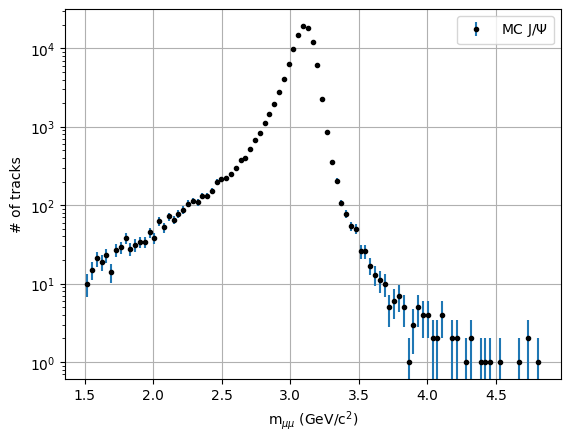

In [7]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [8]:
p0_JPsi = np.array([136241.85680339273, 3.1003675365856544, 0.0630318569252801, 0.993869592186634, 3.0340276033125493, 2.233482641523906, 2.705629560440874])

In [9]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_JPsi, pcov_JPsi, nfev_JPsi, fvec_JPsi, fjac_JPsi = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_JPsi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_JPsi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_JPsi))
print("pcov: \n", pcov_JPsi)
print("residual: \n", nfev_JPsi)

popt: 
 [19463.1256803904, 3.1003936139502484, 0.06391430464025323, 0.9949323611175688, 3.114658267018948, 2.1532085151645797, 2.9965508310243085]
pcov: 
 [[ 1.66520563e+04  1.66830714e-02 -3.69182302e-02 -2.13154029e-01
  -6.71445650e-02 -9.72372710e-01  2.23033991e+00]
 [ 1.66830714e-02  2.67825802e-07 -1.47707614e-07 -5.15255338e-06
   1.56083836e-05 -2.19216176e-06  1.47697921e-06]
 [-3.69182302e-02 -1.47707614e-07  2.17602867e-07  4.54654468e-06
  -1.05158777e-05  7.47221167e-06 -1.57696569e-05]
 [-2.13154029e-01 -5.15255338e-06  4.54654468e-06  2.51483882e-04
  -1.01474862e-03  1.40653086e-04 -2.57053803e-04]
 [-6.71445650e-02  1.56083836e-05 -1.05158777e-05 -1.01474862e-03
   5.80431211e-03 -2.78439694e-04  4.25453570e-04]
 [-9.72372710e-01 -2.19216176e-06  7.47221167e-06  1.40653086e-04
  -2.78439694e-04  1.91689105e-03 -7.44952206e-03]
 [ 2.23033991e+00  1.47697921e-06 -1.57696569e-05 -2.57053803e-04
   4.25453570e-04 -7.44952206e-03  4.03384680e-02]]
residual: 
 {'nfev': 7, '

fit error : 129.0430341356191


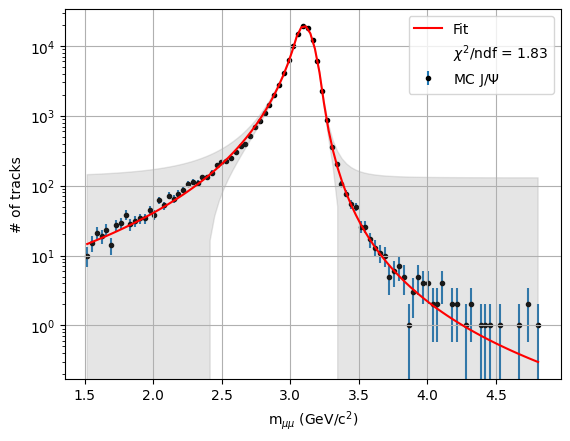

In [10]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC J/$\Psi$', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_JPsi(x_fit, *popt_JPsi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_JPsi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_JPsi(x_data, *popt_JPsi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_JPsi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_5900/2642993752.py:1: RuntimeWarning: divide by zero encountered in divide
  err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))


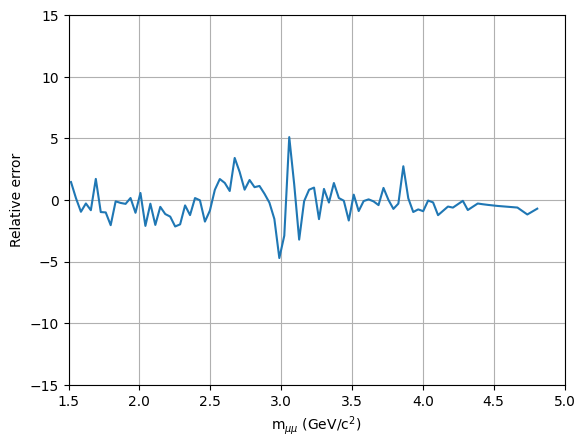

In [11]:
err = np.sqrt(nfev_JPsi["fvec"]**2/(nfev_JPsi["nfev"]-len(popt_JPsi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_JPsi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [12]:
x_data = np.array(X)
y_data = np.array(vMass_Psi)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

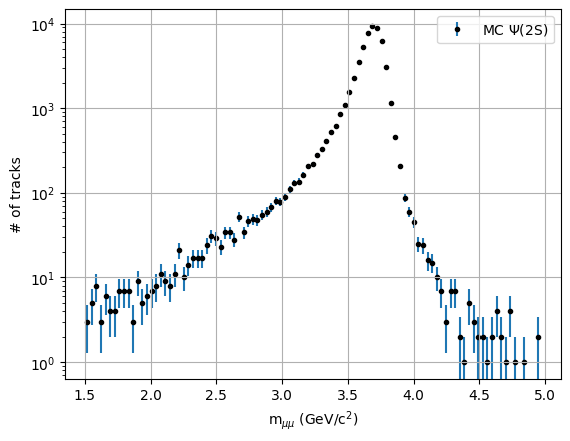

In [13]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [14]:
p0_Psi = np.array([67449.51297432544, 3.693248662583962, 0.06511527893660865, 0.9607870324016564, 2.849198115287005, 2.283717751711943, 2.5497581009488974])

In [15]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_Psi, pcov_Psi, nfev_Psi, fvec_Psi, fjac_Psi = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_Psi, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_Psi, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_Psi))
print("pcov: \n", pcov_Psi)
print("residual: \n", nfev_Psi)

popt: 
 [9559.942265726362, 3.6926809750268546, 0.06656997468398103, 0.9676565191437948, 3.047280530555513, 2.1935638918557734, 2.9056554029010973]
pcov: 
 [[ 5.72421643e+03  1.24456105e-02 -2.71593097e-02 -1.35313838e-01
  -8.35053364e-02 -7.64085035e-01  1.89678288e+00]
 [ 1.24456105e-02  4.19728210e-07 -2.32905464e-07 -7.05644993e-06
   1.88120660e-05 -3.58499936e-06  3.38346997e-06]
 [-2.71593097e-02 -2.32905464e-07  3.42128527e-07  6.28695675e-06
  -1.24792459e-05  1.23346895e-05 -2.82538507e-05]
 [-1.35313838e-01 -7.05644993e-06  6.28695675e-06  3.00647227e-04
  -1.08230286e-03  2.04024898e-04 -4.12964893e-04]
 [-8.35053364e-02  1.88120660e-05 -1.24792459e-05 -1.08230286e-03
   5.75123805e-03 -3.39380183e-04  5.78168065e-04]
 [-7.64085035e-01 -3.58499936e-06  1.23346895e-05  2.04024898e-04
  -3.39380183e-04  3.07771307e-03 -1.20054116e-02]
 [ 1.89678288e+00  3.38346997e-06 -2.82538507e-05 -4.12964893e-04
   5.78168065e-04 -1.20054116e-02  6.38536383e-02]]
residual: 
 {'nfev': 8, 

fit error : 75.65903391827489


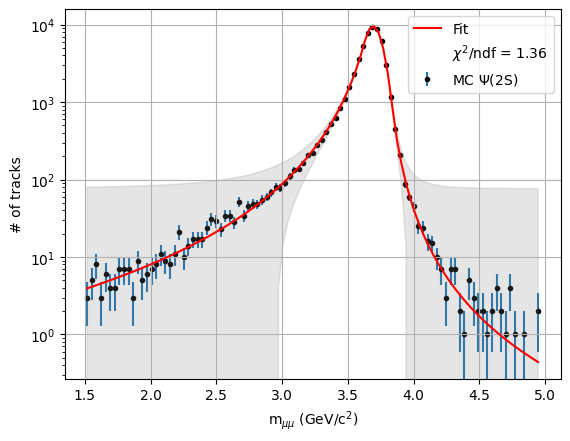

In [16]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC $\Psi$(2S)', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_Psi(x_fit, *popt_Psi)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_Psi)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_Psi(x_data, *popt_Psi)) / y_error) ** 2)
ndf = len(x_data) + len(popt_Psi) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

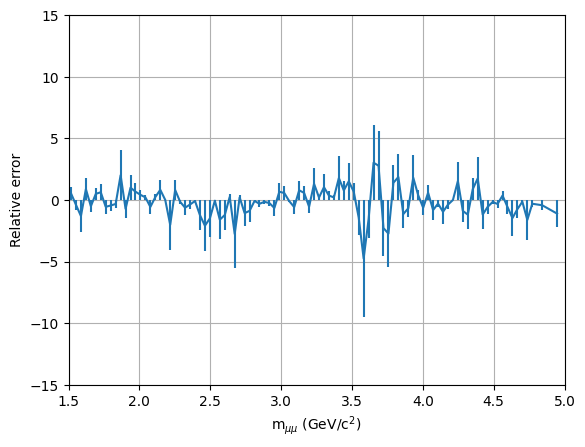

In [17]:
err = np.sqrt(nfev_Psi["fvec"]**2/(nfev_Psi["nfev"]-len(popt_Psi)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_Psi["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [18]:
x_data = np.array(X)
y_data = np.array(vMass_MC)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

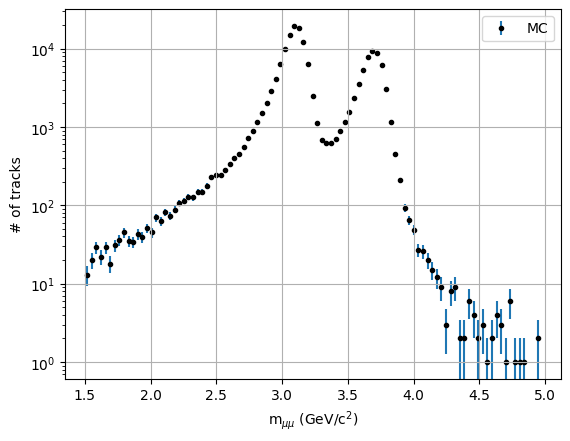

In [19]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [20]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1= popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

p0_MC = np.array([N1, mu1, sig1, N2, mu2, sig2])

In [21]:
def mklb(p0, var):
    return p0*(1-np.sign(p0)*var)

def mkub(p0, var):
    return p0*(1+np.sign(p0)*var)

varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0_MC[:3],varpks), *mklb(p0_MC[3:6],varpks)])
ub = np.array([*mkub(p0_MC[:3],varpks), *mkub(p0_MC[3:6],varpks)])
bounds = (lb,ub)

In [22]:
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, method = 'trf', full_output = True)
popt_MC, pcov_MC, nfev_MC, fvec_MC, fjac_MC = curve_fit(func_MC, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_MC, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_MC))
print("pcov: \n", pcov_MC)
print("residual: \n", nfev_MC)

popt: 
 [19460.717162263845, 3.1003011852576283, 0.06394843059456033, 9559.832502289419, 3.692650656297378, 0.06659812384207114]
pcov: 
 [[ 1.92759939e+04  1.20410956e-02 -3.44499324e-02 -7.41026993e+01
  -1.28058271e-03  1.63355475e-03]
 [ 1.20410956e-02  1.80382681e-07 -3.98004643e-08  6.32816099e-05
   2.50869549e-09 -2.21925316e-09]
 [-3.44499324e-02 -3.98004643e-08  1.19674251e-07  9.17315741e-04
   1.24847282e-08 -1.73705414e-08]
 [-7.41026993e+01  6.32816099e-05  9.17315741e-04  8.98596629e+03
   1.44327272e-02 -3.48728991e-02]
 [-1.28058271e-03  2.50869549e-09  1.24847282e-08  1.44327272e-02
   3.97737907e-07 -1.18794465e-07]
 [ 1.63355475e-03 -2.21925316e-09 -1.73705414e-08 -3.48728991e-02
  -1.18794465e-07  2.68849757e-07]]
residual: 
 {'nfev': 4, 'fvec': array([ 1.54721637, -0.05956082, -1.48795935,  0.07455933, -0.95935303,
        1.75670013, -0.678267  , -1.13941878, -2.04321365, -0.23016556,
        0.38162039, -0.59676722,  0.52211809, -0.72940001,  0.70509133,
       -

fit error : 168.11293867946898


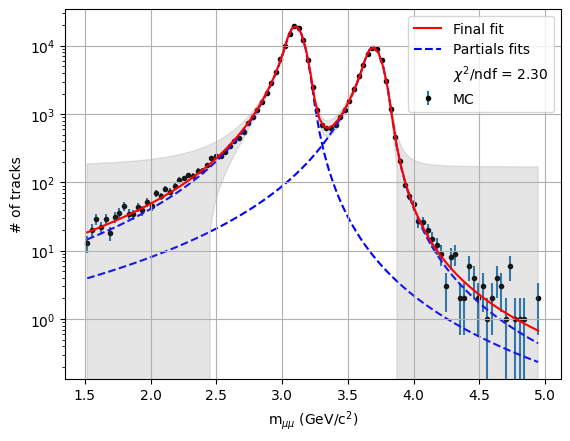

In [23]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'MC', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_MC(x_fit, *popt_MC)
plt.plot(x_fit, y_fit, '-r', label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt_MC[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt_MC[3:6]), '--b', zorder = 1)

sigmas = np.diag(pcov_MC)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_MC(x_data, *popt_MC)) / y_error) ** 2)
ndf = len(x_data) + len(popt_MC) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

/tmp/ipykernel_5900/4254452161.py:1: RuntimeWarning: invalid value encountered in sqrt
  err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))


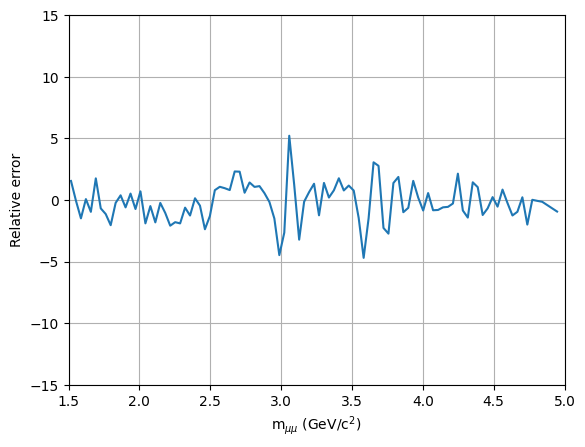

In [24]:
err = np.sqrt(nfev_MC["fvec"]**2/(nfev_MC["nfev"]-len(popt_MC)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_MC["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [25]:
x_data = np.array(X)
y_data = np.array(vMass_LS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

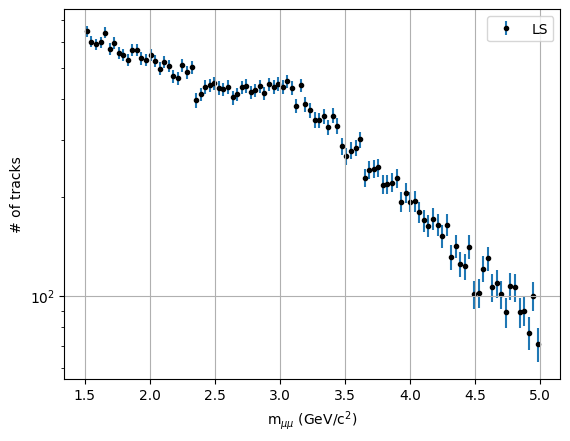

In [26]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [27]:
p0_bckg = np.array([1,1,1,1,1])

In [28]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
popt_bckg, pcov_bckg, nfev_bckg, fvec_bckg, fjac_bckg = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0_bckg, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func_bckg, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt_bckg))
print("pcov: \n", pcov_bckg)
print("residual: \n", nfev_bckg)

popt: 
 [6.484643796730798, 6.1217504324674765, 5.770049330438444, 5.466545409599468, 4.452416675699036]
pcov: 
 [[ 5.62975943e-04 -9.72189955e-05  8.42072396e-05  2.89952413e-05
   1.77042022e-04]
 [-9.72189955e-05  1.14412710e-04  6.52189331e-06 -1.25453339e-05
   6.73110622e-06]
 [ 8.42072396e-05  6.52189331e-06  1.72567264e-04  1.25578809e-04
   3.43826268e-05]
 [ 2.89952413e-05 -1.25453339e-05  1.25578809e-04  2.03568537e-04
  -2.85893234e-04]
 [ 1.77042022e-04  6.73110622e-06  3.43826268e-05 -2.85893234e-04
   3.47488548e-03]]
residual: 
 {'nfev': 15, 'fvec': array([ 0.07614065,  1.25218255,  1.17809926,  0.26691342, -1.8806548 ,
        0.51162829, -1.03210667,  0.34683676,  0.22256499,  0.73602487,
       -1.21248528, -1.59553059, -0.50470999, -0.51672744, -1.56756778,
       -0.83290363,  0.17425359, -1.08994777, -0.68033224,  0.76125711,
        0.86063692, -1.29670638, -0.35572737, -1.30733062,  3.5842867 ,
        2.51600376,  1.19804035,  0.85464851,  0.37230251,  0.903406

fit error : 0.0672934613144328


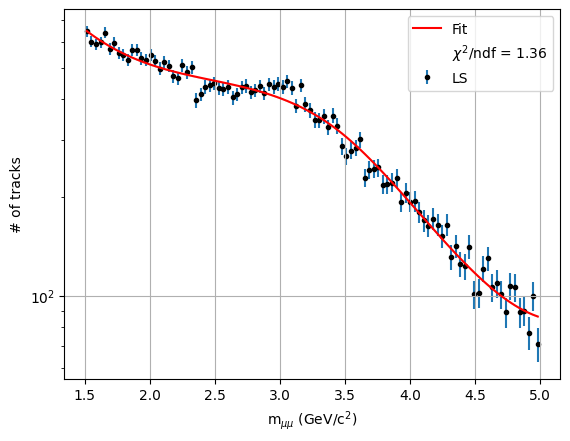

In [29]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'LS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func_bckg(x_fit, *popt_bckg)
plt.plot(x_fit, y_fit, '-r', label = 'Fit')

sigmas = np.diag(pcov_bckg)
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func_bckg(x_data, *popt_bckg)) / y_error) ** 2)
ndf = len(x_data) + len(popt_bckg) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

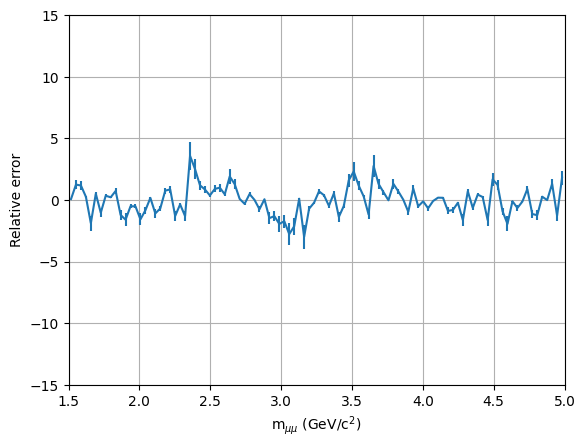

In [30]:
err = np.sqrt(nfev_bckg["fvec"]**2/(nfev_bckg["nfev"]-len(popt_bckg)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev_bckg["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [31]:
x_data = np.array(X)
y_data = np.array(vMass_OS)
y_error = np.array(np.sqrt(y_data))

x_data = x_data[y_data > 0]
y_error = y_error[y_data > 0]
y_data = y_data[y_data > 0]

x_range = np.where(condition_x_range(x_data))
x_filtered = np.ravel(x_data[x_range])
y_filtered = np.ravel(y_data[x_range])
y_error_filtered = np.ravel(y_error[x_range])

x_data = x_filtered
y_data = y_filtered
y_error = y_error_filtered

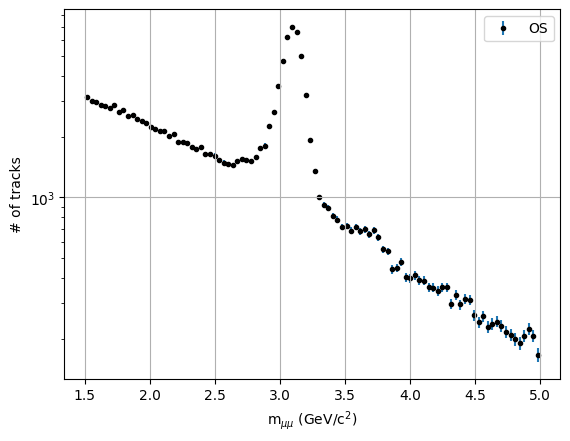

In [32]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.yscale('log')
plt.legend()
plt.grid(True)

In [33]:
N1 = popt_JPsi[0]
mu1 = popt_JPsi[1]
sig1 = popt_JPsi[2]
alphaL1 = popt_JPsi[3]
nL1 = popt_JPsi[4]
alphaR1 = popt_JPsi[5]
nR1 = popt_JPsi[6]

N2 = popt_Psi[0]
mu2 = popt_Psi[1]
sig2 = popt_Psi[2]
alphaL2 = popt_Psi[3]
nL2 = popt_Psi[4]
alphaR2 = popt_Psi[5]
nR2 = popt_Psi[6]

y1 = popt_bckg[0]
y2 = popt_bckg[1]
y3 = popt_bckg[2]
y4 = popt_bckg[3]
y5 = popt_bckg[4]

p0 = np.array([N1, mu1, sig1, N2, mu2, sig2,  y1, y2, y3, y4, y5])

In [34]:
varbg = np.ones(np.shape(p0[6:]))*1# bg parameters variation factor around p0
varpks = np.array([1, 0.1, 0.1])  # peaks parameters variation factor around p0
lb = np.array([*mklb(p0[:3],varpks), *mklb(p0[3:6],varpks), *mklb(p0[6:],varbg)])
ub = np.array([*mkub(p0[:3],varpks), *mkub(p0[3:6],varpks), *mkub(p0[6:],varbg)])
bounds = (lb,ub)

In [35]:
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, method = 'trf', full_output = True)
#popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, method = 'trf', full_output = True)
popt, pcov, nfev, fvec, fjac = curve_fit(func, xdata = x_data, ydata = y_data, sigma = y_error, p0 = p0, bounds = bounds, method = 'trf', full_output = True)

print("popt: \n", list(popt))
print("pcov: \n", pcov)
print("residual: \n", nfev)

popt: 
 [6272.01440577642, 3.0978731891615423, 0.07030573510427328, 126.52084809702592, 3.6884462766298776, 0.073226972150108, 8.070279854964006, 7.335352171742043, 6.555534625875535, 6.2372174433883005, 5.19215867770188]
pcov: 
 [[ 5.87044509e+03  1.04514974e-02 -4.01102369e-02  3.06756121e+01
  -2.88847389e-02  5.74410579e-02 -3.52255175e-02 -1.06717686e-02
  -9.83725679e-02 -6.13422664e-02 -5.27217280e-02]
 [ 1.04514974e-02  7.76027288e-07 -2.62615819e-07 -5.17913658e-04
   6.15031369e-07 -1.16310445e-06  2.90507421e-08  1.39414133e-06
   2.32518847e-06  1.13678886e-06  1.80617048e-06]
 [-4.01102369e-02 -2.62615819e-07  9.27313441e-07  3.14878648e-03
  -1.68467203e-06  3.65356836e-06 -1.68681111e-06 -3.76176852e-06
  -9.68621772e-06 -5.82323510e-06 -4.85066530e-06]
 [ 3.06756121e+01 -5.17913658e-04  3.14878648e-03  6.75466219e+02
   2.93018043e-02 -2.08809912e-01 -3.29997179e-02 -2.54974927e-02
  -1.37317856e-01 -1.21663162e-01  4.87560551e-02]
 [-2.88847389e-02  6.15031369e-07 -1.6

fit error : 80.90683271362545


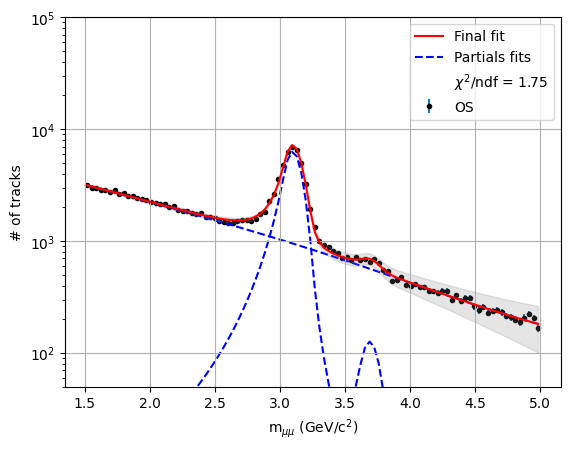

In [36]:
plt.errorbar(x_data, y_data, y_error, marker='o', mfc = 'black', mec = 'black', ms = 3, ls = '', label = r'OS', zorder = 0)

x_fit = np.linspace(min(x_data), max(x_data), 100)
y_fit = func(x_fit, *popt)
plt.plot(x_fit, y_fit, '-r', zorder = 2, label = 'Final fit')
plt.plot(x_fit, fixedFunc_JPsi(x_fit, *popt[:3]), '--b', zorder = 1, label = 'Partials fits')
plt.plot(x_fit, fixedFunc_Psi(x_fit, *popt[3:6]), '--b', zorder = 1)
plt.plot(x_fit, fixedFunc_bckg(x_fit, *popt[6:]), '--b', zorder = 1)

sigmas = np.absolute(np.diag(pcov))
e_fit = np.sqrt(np.sum(sigmas))
print("fit error :", e_fit)
plt.fill_between(x_fit, y_fit - e_fit, y_fit + e_fit, color = 'gray', alpha = 0.2)

chi2 = sum(((y_data - func(x_data, *popt)) / y_error) ** 2)
ndf = len(x_data) + len(popt) - 1
plt.plot(x_fit[0], y_fit[0], visible = False, label = fr'$\chi ^2$/ndf = {chi2/ndf:.2f}')

plt.legend()
plt.yscale('log')
plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'# of tracks')
plt.ylim(50, 100000)
plt.grid(True)

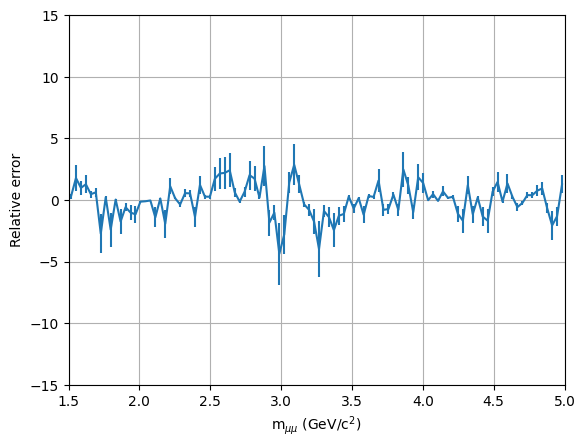

In [37]:
err = np.sqrt(nfev["fvec"]**2/(nfev["nfev"]-len(popt)))
plt.axis((start, stop, -15, 15))
plt.errorbar(x_data, nfev["fvec"], err, marker='', mfc='blue',
         mec='blue', ms=2, mew=5, ls='-')

plt.xlabel(r'm$_{\mu \mu}$ (GeV/c$^2$)')
plt.ylabel(r'Relative error')
plt.grid(True)

In [38]:
# Derivatives

def intervals(rel, alphaL, alphaR):
    I1 = rel < -1 * alphaL
    I2 = (rel >= -1 * alphaL) * (rel <= alphaR)
    I3 = rel > alphaR
    return I1, I2, I3


def dcbdN(x, N, mu, sig, alphaL, nL, alphaR, nR):
    if (type(x) is float):
        x = np.array([x])
    rel = (x-mu)/sig
    I1, I2, I3 = intervals(rel, alphaL, alphaR)
    res = np.zeros(np.shape(x))
    res[I1] = ((nL/np.abs(alphaL))**nL*np.exp(-np.abs(alphaL)**2/2)/(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)**nL)[I1]
    res[I2] = (np.exp(-(-mu + x)**2/(2*sig**2)))                                                                             [I2]
    res[I3] = ((nR/np.abs(alphaR))**nR*np.exp(-np.abs(alphaR)**2/2)/(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)**nR)[I3]
    return res

def dcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
    if (type(x) is float):
        x = np.array([x])
    rel = (x-mu)/sig
    I1, I2, I3 = intervals(rel, alphaL, alphaR)
    res = np.zeros(np.shape(x))
    res[I1] = (-N*nL*(nL/np.abs(alphaL))**nL*np.exp(-np.abs(alphaL)**2/2)/(sig*(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)*(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)**nL)) [I1]
    res[I2] = (-N*(2*mu - 2*x)*np.exp(-(-mu + x)**2/(2*sig**2))/(2*sig**2)                                                                                                                   ) [I2]
    res[I3] = (N*nR*(nR/np.abs(alphaR))**nR*np.exp(-np.abs(alphaR)**2/2)/(sig*(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)*(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)**nR) ) [I3]
    return res

def dcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
    if (type(x) is float):
        x = np.array([x])
    rel = (x-mu)/sig
    I1, I2, I3 = intervals(rel, alphaL, alphaR)
    res = np.zeros(np.shape(x))
    res[I1] = (-N*nL*(nL/np.abs(alphaL))**nL*(-mu + x)*np.exp(-np.abs(alphaL)**2/2)/(sig**2*(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)*(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)**nL)) [I1]
    res[I2] = (N*(-mu + x)**2*np.exp(-(-mu + x)**2/(2*sig**2))/sig**3                                                                                                                                     ) [I2]
    res[I3] = (N*nR*(nR/np.abs(alphaR))**nR*(-mu + x)*np.exp(-np.abs(alphaR)**2/2)/(sig**2*(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)*(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)**nR) ) [I3]
    return res

def IdcbdN(x, *args):
    return quad(dcbdN, start, stop, args=args)[0]

def Idcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR):
    return quad(dcbdmu, start, stop, args=args)[0]

def Idcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR):
    return quad(dcbdsig, start, stop, args=args)[0]

def sig2cb(pcov, x, N, mu, sig, alphaL, nL, alphaR, nR):
    return IdcbdN(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[0,0]
    +Idcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[1,1]
    +Idcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR)**2 * pcov[2,2]
    +2*IdcbdN(x, N, mu, sig, alphaL, nL, alphaR, nR)*Idcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(pcov[0, 1])
    +2*IdcbdN(x, N, mu, sig, alphaL, nL, alphaR, nR)*Idcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(pcov[0, 2])
    +2*Idcbdmu(x, N, mu, sig, alphaL, nL, alphaR, nR)*Idcbdsig(x, N, mu, sig, alphaL, nL, alphaR, nR) * np.sqrt(pcov[1, 2])
    
N_JPsi = quad(fixedFunc_JPsi, start, stop, args = (*popt[:3], ))[0] / ((stop - start)/bins)
err_JPsi = np.sqrt(sig2cb(pcov[:3, :3], x_data, *popt[:3], *popt_JPsi[3:])) / ((stop - start)/bins)
print(r"N_JPsi = ", N_JPsi, " +/- ", err_JPsi)

N_JPsi =  38126.915008538446  +/-  465.75779674451564


/tmp/ipykernel_5900/702439652.py:16: RuntimeWarning: invalid value encountered in power
  res[I1] = ((nL/np.abs(alphaL))**nL*np.exp(-np.abs(alphaL)**2/2)/(nL/np.abs(alphaL) - np.abs(alphaL) - (-mu + x)/sig)**nL)[I1]
/tmp/ipykernel_5900/702439652.py:18: RuntimeWarning: invalid value encountered in power
  res[I3] = ((nR/np.abs(alphaR))**nR*np.exp(-np.abs(alphaR)**2/2)/(nR/np.abs(alphaR) - np.abs(alphaR) + (-mu + x)/sig)**nR)[I3]
